In [83]:
import SingleElectronRadiation as SER
import numpy
import matplotlib.pyplot as pyplot
import LarmorPowerFrequencyCalculation as LPFC

In [84]:
antennaPosition = numpy.array([0.02,0,0])
antennaPolarisation = numpy.array([0,1,0])

# Analytic solutions
eMass = 9.10938356e-31
eCharge = 1.602176634e-19
c = 299792458
timeStep = 1e-12
times = numpy.arange(0, 1e-9, step=timeStep)
BField = 1

In [85]:
# Calculate initial conditions
KEeV = 18600
KEJ = KEeV*eCharge
gamma = KEJ/(eMass*c**2)+1
print("Gamma:",gamma)

vsquared = c**2 * (1-1/gamma**2)
v = numpy.sqrt(vsquared)
angularFrequency = LPFC.AngularFrequency(KEJ, BField)
print("Angular Frequency:",angularFrequency)
print("Frequency:",angularFrequency/(2*numpy.pi))

pitchAngleDeg = 90
perpendicularVelocity = v * numpy.sin(pitchAngleDeg/180*numpy.pi)

Amplitude = LPFC.CyclotronRadius(perpendicularVelocity, BField, gamma, angularFrequency)



EPosition = []
EVelocity = []
EAcceleration = []
RelFarEField = []
RelNearEField = []
antennaVoltage = []

# Calculate motion, EField and voltage with relativistic Larmor power loss
for i in range(len(times)):
    ElectronMotion = SER.CalcElectronCircularMotion(times[i],angularFrequency,Amplitude,ZPos=0)
    EPosition.append( ElectronMotion[0] )
    EVelocity.append( ElectronMotion[1] )
    EAcceleration.append( ElectronMotion[2] )
    FarEFieldPart = SER.CalcRelFarEField(antennaPosition,times,EPosition[i],EVelocity[i],EAcceleration[i])[0]
    NearEFieldPart = SER.CalcRelNearEField(antennaPosition,times,EPosition[i],EVelocity[i],EAcceleration[i])[0]
    RelFarEField.append( FarEFieldPart )
    RelNearEField.append( NearEFieldPart )
    
    wavelength = c / (angularFrequency / 2 / numpy.pi)
    HalfWaveDipoleEffectiveLength = SER.HalfWaveDipoleEffectiveLength(wavelength)
    antennaVectorEffectiveLength = HalfWaveDipoleEffectiveLength * antennaPolarisation
    antennaVoltage.append( numpy.dot(antennaVectorEffectiveLength, FarEFieldPart+NearEFieldPart) )
    
    RelPower = SER.CalcRelativisticLarmorPower(EVelocity[i], EAcceleration[i])
    EnergyEmitted = RelPower*timeStep
    KEJ -= EnergyEmitted
    gamma = KEJ/(eMass*c**2)+1
    vsquared = c**2 * (1-1/gamma**2)
    v = numpy.sqrt(vsquared)
    angularFrequency = LPFC.AngularFrequency(KEJ, BField)
    perpendicularVelocity = v * numpy.sin(pitchAngleDeg/180*numpy.pi)
    Amplitude = LPFC.CyclotronRadius(perpendicularVelocity, BField, gamma, angularFrequency)

EPosition = numpy.array(EPosition)
EVelocity = numpy.array(EVelocity)
EAcceleration = numpy.array(EAcceleration)
RelFarEField = numpy.array(RelFarEField)
RelNearEField = numpy.array(RelNearEField)
print("First far Efield component:",RelFarEField[0])
print("First near Efield component:",RelNearEField[0])
TotalEField = RelFarEField + RelNearEField
print("First total Efield component:",TotalEField[0])
antennaVoltage = numpy.array(antennaVoltage)

Gamma: 1.03639929257988
Angular Frequency: 169704866713.53223
Frequency: 27009368404.209904
First far Efield component: [ 0.00000000e+00  2.87933913e-06 -0.00000000e+00]
First near Efield component: [ 3.51260331e-06 -9.22741256e-07  0.00000000e+00]
First total Efield component: [3.51260331e-06 1.95659788e-06 0.00000000e+00]


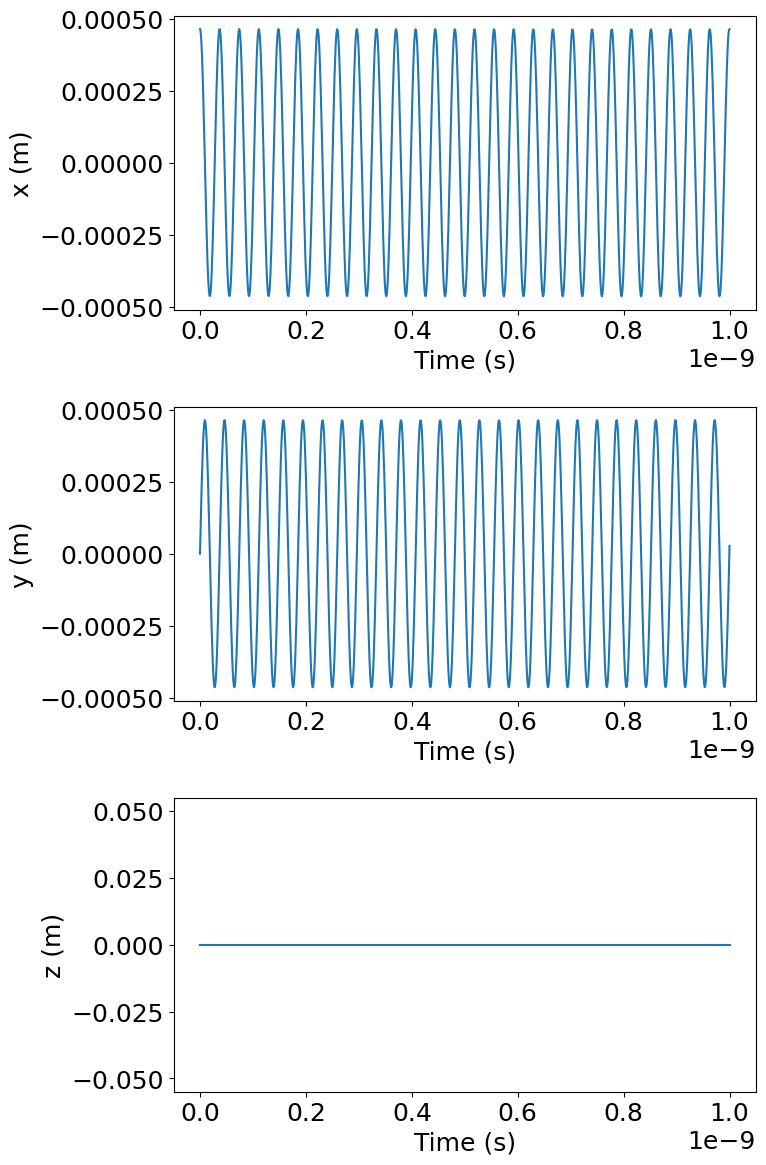

In [86]:
figEMotion, axEMotion = pyplot.subplots(3,1,figsize=[8,12])
axEMotion[0].plot(times, EPosition[:,0])
axEMotion[0].set_xlabel("Time (s)")
axEMotion[0].set_ylabel("x (m)")
axEMotion[1].plot(times, EPosition[:,1])
axEMotion[1].set_xlabel("Time (s)")
axEMotion[1].set_ylabel("y (m)")
axEMotion[2].plot(times, EPosition[:,2])
axEMotion[2].set_xlabel("Time (s)")
axEMotion[2].set_ylabel("z (m)")
figEMotion.tight_layout()

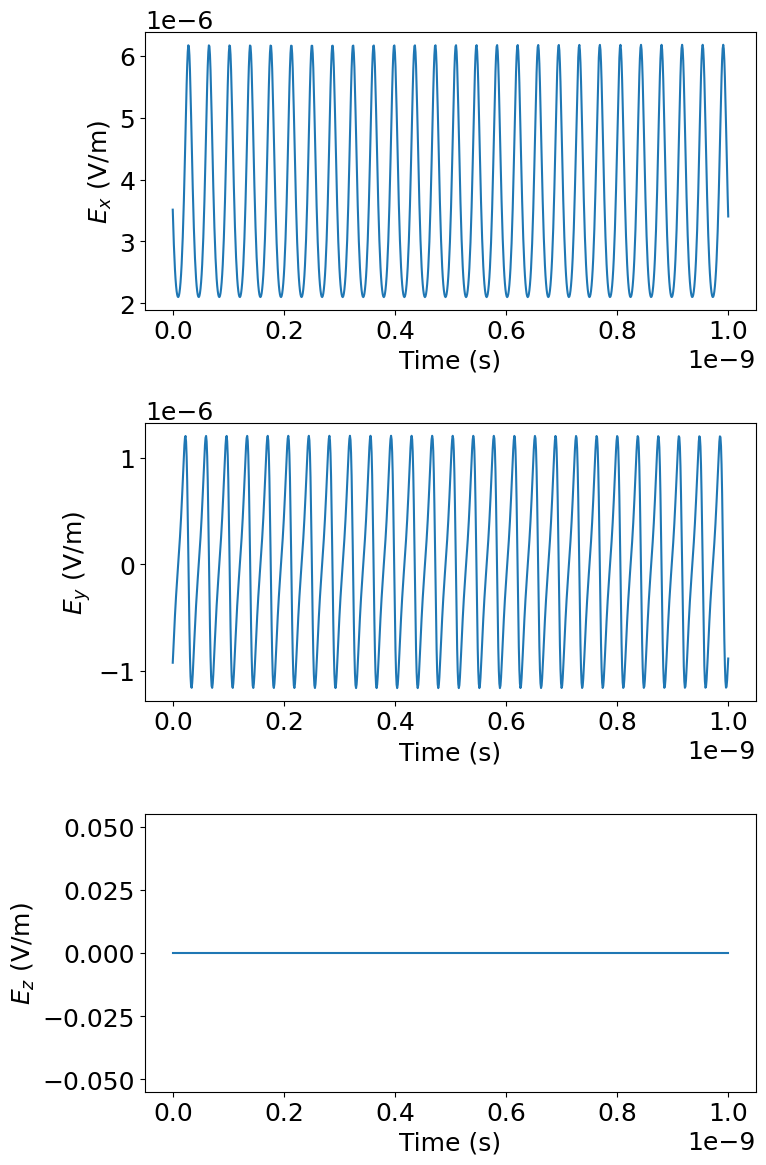

In [87]:
figEFieldNear, axEFieldNear = pyplot.subplots(3,1,figsize=[8,12])
axEFieldNear[0].plot(times, RelNearEField[:,0])
axEFieldNear[0].set_xlabel("Time (s)")
axEFieldNear[0].set_ylabel(r"$E_x$ (V/m)")
axEFieldNear[1].plot(times, RelNearEField[:,1])
axEFieldNear[1].set_xlabel("Time (s)")
axEFieldNear[1].set_ylabel(r"$E_y$ (V/m)")
axEFieldNear[2].plot(times, RelNearEField[:,2])
axEFieldNear[2].set_xlabel("Time (s)")
axEFieldNear[2].set_ylabel(r"$E_z$ (V/m)")
figEFieldNear.tight_layout()

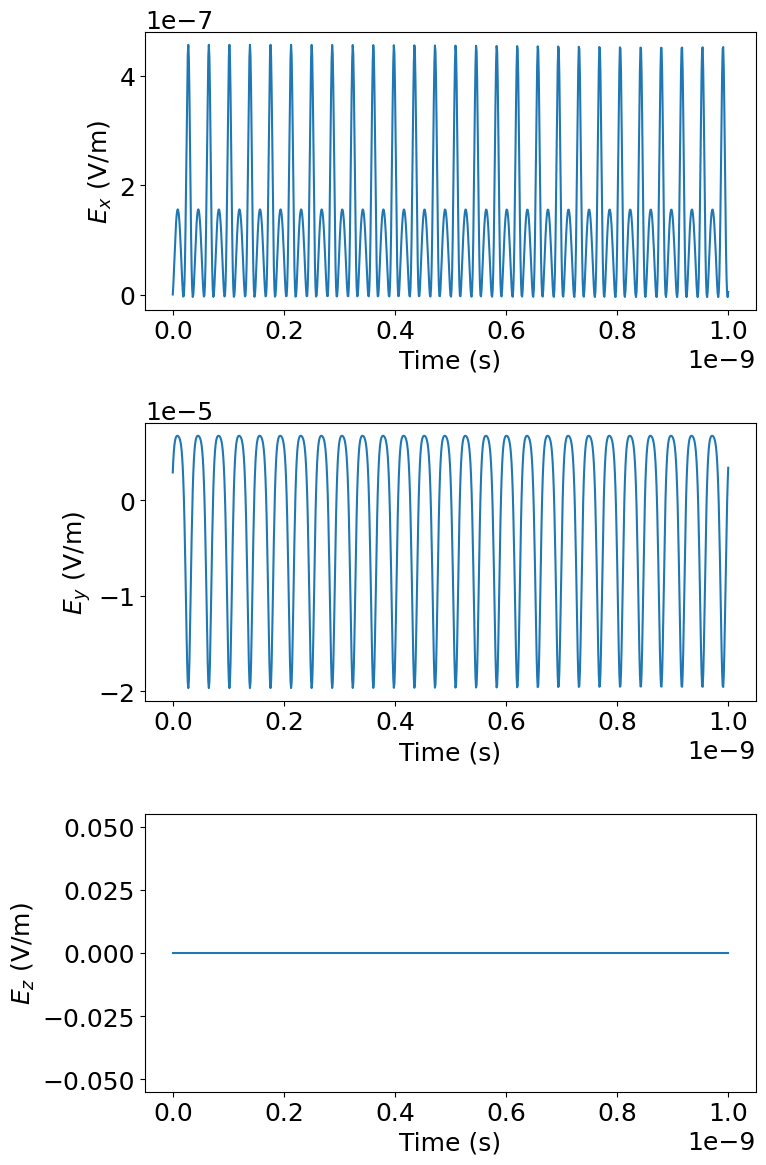

In [88]:
figEFieldFar, axEFieldFar = pyplot.subplots(3,1,figsize=[8,12])
axEFieldFar[0].plot(times, RelFarEField[:,0])
axEFieldFar[0].set_xlabel("Time (s)")
axEFieldFar[0].set_ylabel(r"$E_x$ (V/m)")
axEFieldFar[1].plot(times, RelFarEField[:,1])
axEFieldFar[1].set_xlabel("Time (s)")
axEFieldFar[1].set_ylabel(r"$E_y$ (V/m)")
axEFieldFar[2].plot(times, RelFarEField[:,2])
axEFieldFar[2].set_xlabel("Time (s)")
axEFieldFar[2].set_ylabel(r"$E_z$ (V/m)")
figEFieldFar.tight_layout()

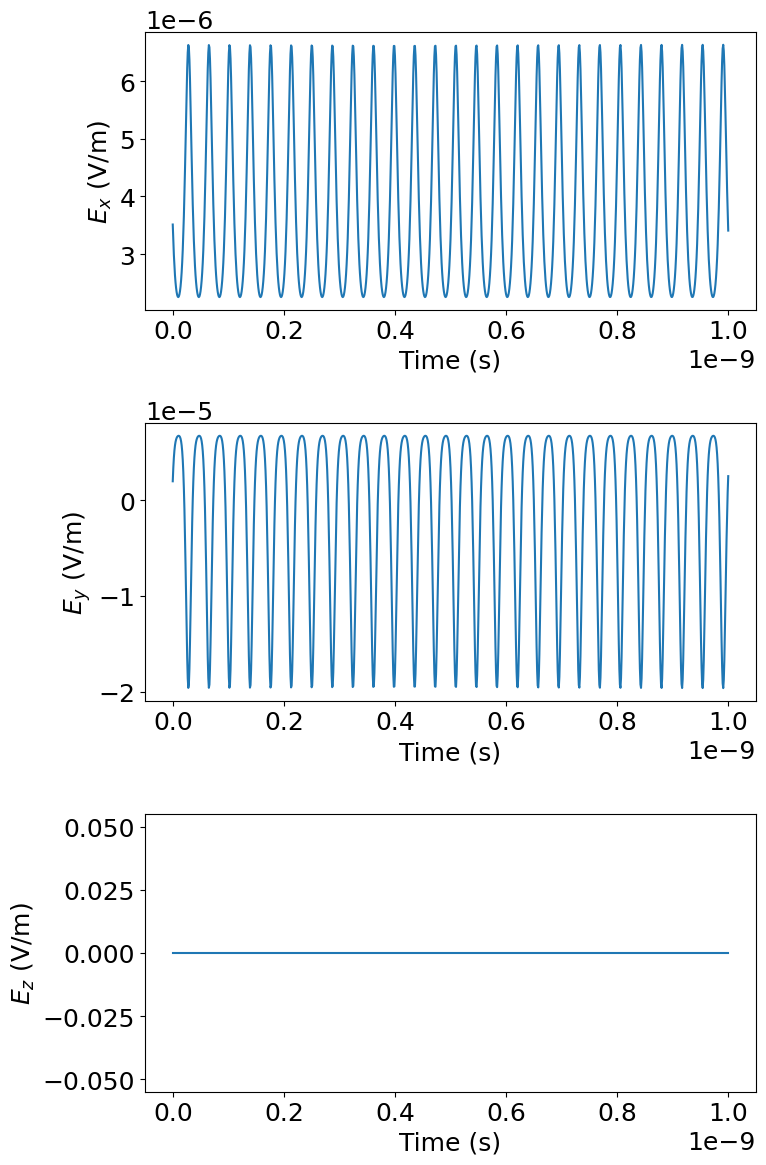

In [89]:
figEFieldTot, axEFieldTot = pyplot.subplots(3,1,figsize=[8,12])
axEFieldTot[0].plot(times, TotalEField[:,0])
axEFieldTot[0].set_xlabel("Time (s)")
axEFieldTot[0].set_ylabel(r"$E_x$ (V/m)")
axEFieldTot[1].plot(times, TotalEField[:,1])
axEFieldTot[1].set_xlabel("Time (s)")
axEFieldTot[1].set_ylabel(r"$E_y$ (V/m)")
axEFieldTot[2].plot(times, TotalEField[:,2])
axEFieldTot[2].set_xlabel("Time (s)")
axEFieldTot[2].set_ylabel(r"$E_z$ (V/m)")
figEFieldTot.tight_layout()

Text(0, 0.5, 'Voltage (V)')

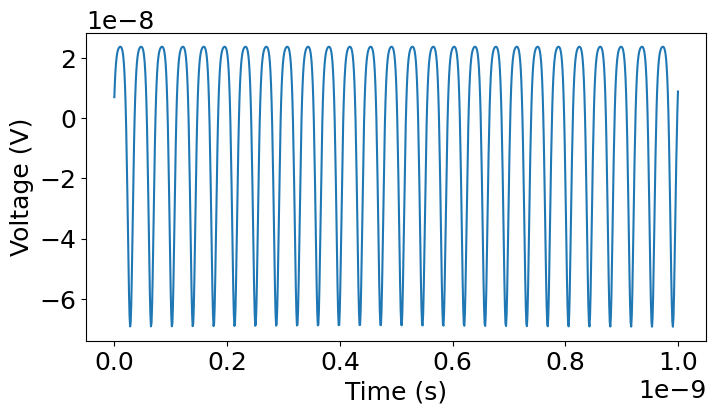

In [90]:
figVoltage, axVoltage = pyplot.subplots(1,1,figsize=[8,4])
axVoltage.plot(times, antennaVoltage)
axVoltage.set_xlabel("Time (s)")
axVoltage.set_ylabel("Voltage (V)")
